# Best Pittsburgh Neighborhood by Safety + Health

### Group Name: The Mighty Pandas
* Noah Blayney, Andrew Morales, Yves Bayubahe

### Introductions
The Three Datasets we used are from the WPRDC
* City Trees https://data.wprdc.org/dataset/city-trees (Noah)
* Median Age of Death https://data.wprdc.org/dataset/median-age-death (Yves)
* Police Incidents https://data.wprdc.org/dataset/police-incident-blotter (Andrew)

The first dataset analyzed was the City Trees set which documents 45,709 trees as of November 10, 2020. The reasoning for this set is that trees are beneficial in many ways and environmentally friendly. The second dataset used was the Median Age of Death across around 90 neighborhoods. This data is from 2011 to 2015 but was last updated in 2017. Obviously this is not super recent but it is doubtful that these numbers would have drastically changed in the last few years. The median age of death is a sign of a healthy living environment and should be considered when analyzing the best neighborhoods. Finally, the last metric was based upon Police Incidents. This set is based on 30 day periods and was last updated on November 16, 2020. This means the values could easily change month by month and tends to favor low population areas. Safety is a major concern when choosing where to live which is what led us to check this dataset.

## Trees Metric by Noah Blayney

The metric that I chose to base my ranking on was trees. The dataset I used was https://data.wprdc.org/dataset/city-trees. This is a database of a lot of trees and seems to be regularly updated so I had to reorganize the set to count the number of instances each neighborhood shows up. The idea here is that trees indicate better air quality and more environmental benefits. Some of those benefits include taming stormwater, fighting climate change, saving energy, and handling air pollution. Trees are also frequently visually appealing as well. 

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
pgh_trees_data = pd.read_csv("https://data.wprdc.org/datastore/dump/1515a93c-73e3-4425-9b35-1cd11b2196da",
                           usecols = ['neighborhood']) #each entry is a tree so I only need the number of times each neighborhood shows up

most_trees = pgh_trees_data['neighborhood'].value_counts().rename_axis('Neighborhood').to_frame('Trees').head(30) #re-sort by occurances and fix names of columns
most_trees.head()

,Trees
Neighborhood,
Squirrel Hill South,5073
Highland Park,2941
Squirrel Hill North,2083
South Side Flats,1693
Shadyside,1558


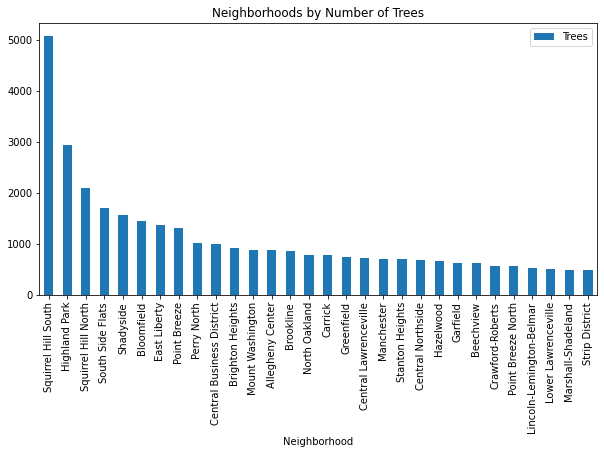

In [3]:
most_trees.plot.bar(title = "Neighborhoods by Number of Trees", figsize=(10,5))

## Tree Metric Conlusion
In conclusion the best neighborhood by my metric was Squirrel Hill South. In second place was Highland Park and then Squirrel Hill North was third.  Air quality in Squirrel Hill South is likely better than a neighborhood that came in last like Arlington Heights or Fairywood. It is important however to point out that Squirrel Hill South likely includes the trees found in Schenley Park which is a large reason it is number one by such a large margin. That being said I still believe having a park in your neighborhood is beneficial so I chose to let it stay number one in my metric.

## Median Age of Death by Yves Bayubahe

The metric I chose for best neighborhood in Pittsburgh is the median age of death. The source of the dataset is https://data.wprdc.org/dataset/median-age-death. One of the potential metrics I wanted to use was the sewage sheds per neighborhood as an indicator of pollution but the dataset did not divide them into individual neighborhoods so it was too difficult to extract that data. 

The median age of death is an indicator of standard health/wealth, as people in the same social/economic class tend to live in the same neighborhoods. The data set contains statistics on black and white deaths and median age of death per neighborhood, the specifc metric used is total median age of death regardless of race.

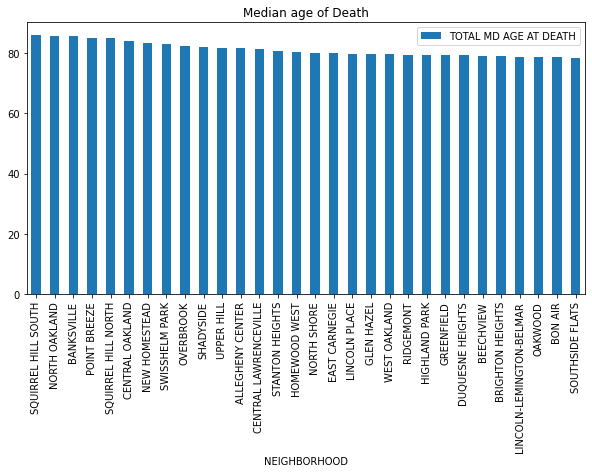

In [9]:
pgh_md_death = pd.read_csv("https://data.wprdc.org/dataset/ee735209-4de7-4ea4-b446-bf0f0f6d9cb3/resource/c2e1500a-a12a-4e91-be94-76c6a892b7e2/download/nhoodmedianage20112015.csv",
                          usecols = ['NEIGHBORHOOD','TOTAL MD AGE AT DEATH'])

pgh_md_death=pgh_md_death.dropna() #drops NA values and cleans up data set

pgh_md_death = pgh_md_death.sort_values(by='TOTAL MD AGE AT DEATH', ascending=False) #sorts the set from high to low
pgh_md_death = pgh_md_death.head(30) #cuts the set to the top 30 for a clean bar chart

pgh_md_death.plot.bar(x = 'NEIGHBORHOOD',title = "Median age of Death", figsize=(10,5))

## Second Metric Conlusion

Ultimately, the best neighborhood by the metric of median age of death is Squirrel   South. Graphically, it shows to have the highest median age of death at 85.9 which again indicates a higher standard of living. Runner-ups would include North Oakland, Banksville, Point Breeze, and Squirrel Hill North. Not all neighborhoods were represented as there were many and some neighborhoods lacked statistics so their median turned out to be much lower than the more populous neighborhoods.

## Police Incidents by Hierarchy Andrew Morales
The metric I chose is based on the location and priority of police incidents. The dataset I used was https://data.wprdc.org/dataset/police-incident-blotter. Police incidents based on hierarchy are able to pinpoint where the most and least dangerous neighborhoods are.

Text(0, 0.5, 'Number of Offenses')

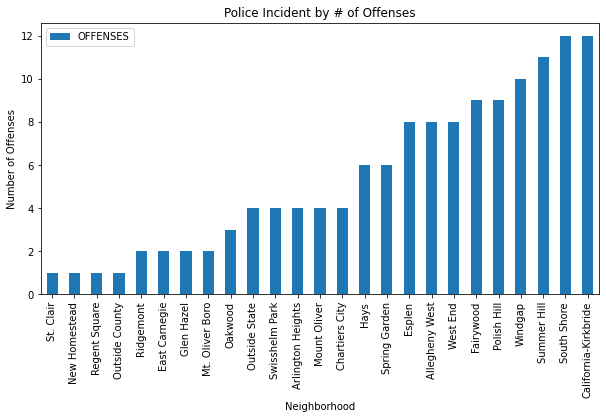

In [5]:
pib = pd.read_csv("pib.csv")                 
pib = pib.drop(['PK','CCR','HIERARCHY','INCIDENTTIME','INCIDENTLOCATION','CLEAREDFLAG','INCIDENTZONE','INCIDENTHIERARCHYDESC','INCIDENTHIERARCHYDESC','INCIDENTTRACT','COUNCIL_DISTRICT','PUBLIC_WORKS_DIVISION','X','Y'],axis=1)

pib = pib.groupby("INCIDENTNEIGHBORHOOD").count()
pib = pib.sort_values(by='OFFENSES', ascending=True)
pib = pib.head(25)
pib.plot.bar(y = "OFFENSES",title = "Police Incident by # of Offenses", figsize=(10,5))
plt.xlabel("Neighborhood")
plt.ylabel("Number of Offenses")

Text(0, 0.5, 'Number of Offenses')

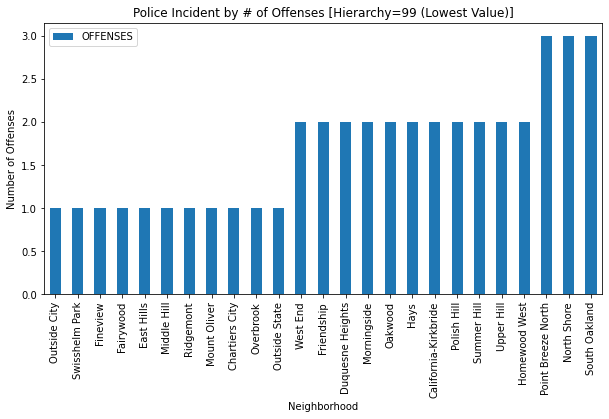

In [6]:
pib = pd.read_csv("pib.csv")                   
pib = pib.drop(['PK','CCR','INCIDENTTIME','INCIDENTLOCATION','CLEAREDFLAG','INCIDENTZONE','INCIDENTHIERARCHYDESC','INCIDENTHIERARCHYDESC','INCIDENTTRACT','COUNCIL_DISTRICT','PUBLIC_WORKS_DIVISION','X','Y'],axis=1)
#Only check crimes lowest of the hierarchy
pib = pib[pib.HIERARCHY == 99]
pib = pib.drop(['HIERARCHY'], axis = 1)

pib = pib.groupby("INCIDENTNEIGHBORHOOD").count()
pib = pib.sort_values(by='OFFENSES', ascending=True)
pib = pib.head(25)
pib.plot.bar(y = "OFFENSES",title = "Police Incident by # of Offenses [Hierarchy=99 (Lowest Value)]", figsize=(10,5))
plt.xlabel("Neighborhood")
plt.ylabel("Number of Offenses")

## Police Incident Metric Conclusion 
In conclusion, the best neighborhood by this metric would have to be **Ridgemont**. Ridgemont has the least total offenses when including crimes of all portions of the hierarchy, as well as one of the fewest in crimes lowest on the hiearchy. This metric heavily favors low population neighborhoods because incidents are less likely to occur. With this in mind, **New Homestead** would be a very close contender for best neighbor hood. Other neighborhoods that could be considered for best neighborhood are St. Clair or Regent Square.


In [7]:
pib = pd.read_csv("pib.csv")                 
pib = pib.drop(['PK','CCR','HIERARCHY','INCIDENTTIME','INCIDENTLOCATION','CLEAREDFLAG','INCIDENTZONE','INCIDENTHIERARCHYDESC','INCIDENTHIERARCHYDESC','INCIDENTTRACT','COUNCIL_DISTRICT','PUBLIC_WORKS_DIVISION','X','Y'],axis=1)
pib = pib.groupby("INCIDENTNEIGHBORHOOD").count()
pib = pib.sort_values(by='OFFENSES', ascending=True)
print(pib.head(30),"\n\n")

pib = pd.read_csv("pib.csv")                   
pib = pib.drop(['PK','CCR','INCIDENTTIME','INCIDENTLOCATION','CLEAREDFLAG','INCIDENTZONE','INCIDENTHIERARCHYDESC','INCIDENTHIERARCHYDESC','INCIDENTTRACT','COUNCIL_DISTRICT','PUBLIC_WORKS_DIVISION','X','Y'],axis=1)
pib = pib[pib.HIERARCHY == 99]
pib = pib.drop(['HIERARCHY'], axis = 1)
pib = pib.groupby("INCIDENTNEIGHBORHOOD").count()
pib = pib.sort_values(by='OFFENSES', ascending=True)
print(pib.head(30))

                      OFFENSES
INCIDENTNEIGHBORHOOD          
St. Clair                    1
New Homestead                1
Regent Square                1
Outside County               1
Ridgemont                    2
East Carnegie                2
Glen Hazel                   2
Mt. Oliver Boro              2
Oakwood                      3
Outside State                4
Swisshelm Park               4
Arlington Heights            4
Mount Oliver                 4
Chartiers City               4
Hays                         6
Spring Garden                6
Esplen                       8
Allegheny West               8
West End                     8
Fairywood                    9
Polish Hill                  9
Windgap                     10
Summer Hill                 11
South Shore                 12
California-Kirkbride        12
Overbrook                   12
Lincoln Place               13
Bon Air                     13
Friendship                  14
North Shore                 15 


     

# Best Overall Neighborhood Conclusion

While the first two metrics, Trees and Median Age of Death, favor Squirrel Hill South to be the best neighborhood in Pittsburgh, it is important to look at how each metric favors population. For example, a small neighborhood with little documented trees would show up very low on the trees metric. This is unfair because after non-data analysis there are some neighborhoods with many more trees than are actually entered on the dataset. With that in mind we favored Life Expectancy and Low Crime Rates more. After cross-referencing the sets we came to the conclusion that **New Homestead** is a fantastic balance of all 3 metrics. New Homestead is a small neighborhood with a population of a little over 1,000 but has a high life-expectancy and actually has more trees than are entered on the dataset. Personally we have never been to New Homestead and it looks like a very residential area. My own favorite would have been Shadyside because I think there would be more to do in Shadyside but that is not what our metrics were based upon.

![NewHomestead](https://media.giphy.com/media/DkN2SX8vCFZfdbKlc9/giphy.gif)